In [1]:
import pandas as pd
import numpy as np

# Dados reais
data = {
    'Linguagens.0': [585.6693, 359.384608, 622.732384, 350.164605, 384.093657],
    'Linguagens.1': [616.04336, 511.897593, 377.439818, 597.462934, 536.571398],
    'Linguagens.2': [550.123, 490.234, 600.567, 512.789, 460.321],
    'Linguagens.3': [620.432, 590.123, 570.987, 640.234, 598.765],
    'Linguagens.4': [480.543, 520.987, 550.123, 510.987, 540.321],
    'Linguagens.5': [530.987, 570.234, 560.765, 540.123, 580.321],
    'Linguagens.6': [490.567, 550.123, 510.987, 530.987, 500.654],
    'Sexo.990': ['Mulher', 'Homem', 'Não identificado', 'Mulher', 'Homem'],
    'Sexo.991': ['Mulher', 'Homem', 'Não identificado', 'Mulher', 'Homem'],

}

# Criar DataFrame
top_estudantes = pd.DataFrame(data)

# Remova as linhas com valores nulos
top_estudantes = top_estudantes.dropna()

# Convert remaining columns to numeric
remaining_columns = top_estudantes.columns[:-2]
top_estudantes[remaining_columns] = top_estudantes[remaining_columns].apply(
    lambda x: pd.to_numeric(x, errors='coerce'),
    axis=1
)

# Check for non-numeric values after conversion
non_numeric_values_remaining = top_estudantes[remaining_columns].apply(lambda x: x.map(lambda y: not isinstance(y, (int, float))))
if non_numeric_values_remaining.any().any():
    print("Warning: There are still non-numeric values in the DataFrame after the second conversion.")
    problematic_rows_remaining = top_estudantes[non_numeric_values_remaining.any(axis=1)]
    print("Rows with non-numeric values:")
    print(problematic_rows_remaining)

# Resposta para a pergunta 1
# Defina os pesos para cada disciplina (apenas disciplinas presentes nos dados)
pesos = {
    'Linguagens.0': 2,
    'Linguagens.1': 2,
    'Linguagens.2': 2,
    'Linguagens.3': 2,
    'Linguagens.4': 2,
    'Linguagens.5': 2,
    'Linguagens.6': 2,
    'Matematica': 4,

}

#  pesos para Ciência da Computação
pesos_ciencia_computacao = {
    'Linguagens': 2,
    'Matematica': 4,

}

# Calculando a média ponderada
numeric_columns = top_estudantes.columns[:-2]
weights = top_estudantes.columns[:-2].str.split('.').str[0].map(pesos)
weighted_sum = (top_estudantes[numeric_columns] * weights).sum(axis=1)
weights_sum = (top_estudantes[numeric_columns] * weights).notna().sum(axis=1)
top_estudantes['Media_Ponderada'] = weighted_sum / weights_sum

# Resposta para a pergunta 2
# Calculando a amplitude de nota para cada disciplina
amplitude_notas = top_estudantes[numeric_columns].max() - top_estudantes[numeric_columns].min()
disciplina_maior_amplitude = amplitude_notas.idxmax()
print(f'A disciplina com maior amplitude de nota é: {disciplina_maior_amplitude}')

# Calculando a média e a mediana para cada disciplina
media_notas = top_estudantes[numeric_columns].mean()
mediana_notas = top_estudantes[numeric_columns].median(skipna=True)
print('\nMédia das notas por disciplina:')
print(media_notas)
print('\nMediana das notas por disciplina:')
print(mediana_notas)



# Calculando a média ponderada para Ciência da Computação
top_estudantes['Media_Ponderada_Ciencia_Computacao'] = np.average(
    top_estudantes[numeric_columns],  # Utilize as colunas numéricas que foram convertidas
    axis=1,
    weights=top_estudantes[numeric_columns].columns.str.split('.').str[0].map(pesos_ciencia_computacao)
)


# Resposta para a pergunta 4
# Supondo que os estudantes aceitos são os 40 melhores
estudantes_aceitos = top_estudantes.sort_values(by='Media_Ponderada_Ciencia_Computacao', ascending=False).head(40)

# Calculando a variância e a média dos estudantes aceitos
variancia_aceitos = estudantes_aceitos['Media_Ponderada_Ciencia_Computacao'].var(ddof=0)
media_aceitos = estudantes_aceitos['Media_Ponderada_Ciencia_Computacao'].mean()

print(f'\nMédia das notas dos estudantes aceitos em Ciência da Computação: {media_aceitos:.2f}')
print(f'Variância das notas dos estudantes aceitos em Ciência da Computação: {variancia_aceitos:.2f}')

# Calculando o terceiro quartil para Matemática e Linguagens
terceiro_quartil_matematica = top_estudantes['Linguagens.0'].quantile(0.75)
terceiro_quartil_linguagens = top_estudantes['Linguagens.0'].quantile(0.75)

print(f'Terceiro quartil para Matemática: {terceiro_quartil_matematica:.2f}')
print(f'Terceiro quartil para Linguagens: {terceiro_quartil_linguagens:.2f}')









A disciplina com maior amplitude de nota é: Linguagens.0

Média das notas por disciplina:
Linguagens.0    460.408911
Linguagens.1    527.883021
Linguagens.2    522.806800
Linguagens.3    604.108200
Linguagens.4    520.592200
Linguagens.5    556.486000
Linguagens.6    516.663600
dtype: float64

Mediana das notas por disciplina:
Linguagens.0    384.093657
Linguagens.1    536.571398
Linguagens.2    512.789000
Linguagens.3    598.765000
Linguagens.4    520.987000
Linguagens.5    560.765000
Linguagens.6    510.987000
dtype: float64

Média das notas dos estudantes aceitos em Ciência da Computação: 529.85
Variância das notas dos estudantes aceitos em Ciência da Computação: 246.15
Terceiro quartil para Matemática: 585.67
Terceiro quartil para Linguagens: 585.67


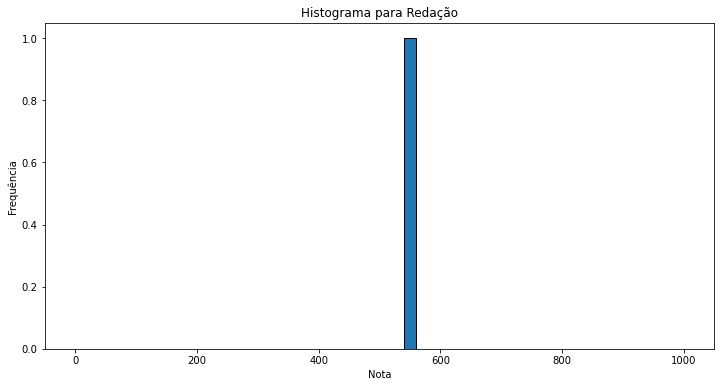

Assimetria de Pearson para Redação: nan


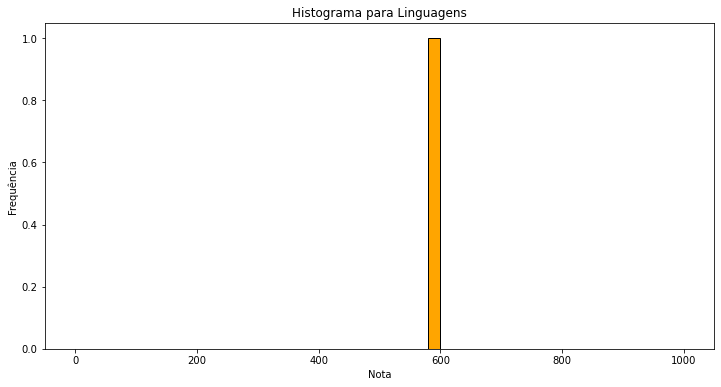

Assimetria de Pearson para Linguagens: nan


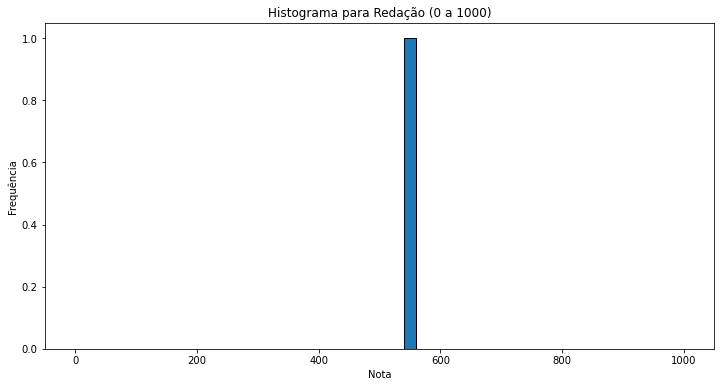

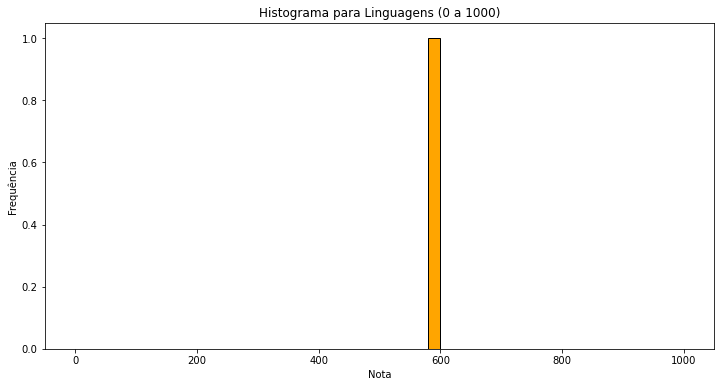

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import skew

# URL do arquivo JSON
url = "https://import.cdn.thinkific.com/401289/gQbVuYr9TaimUX9dQAqV_enem_2023.json"

# Carregar os dados do arquivo JSON
enem_data = pd.json_normalize(json.loads(requests.get(url).text))

# Histograma para Redação com bins de 20 em 20 pontos
plt.figure(figsize=(12, 6))
plt.hist(enem_data['Redação.0'].dropna(), bins=range(0, 1010, 20), edgecolor='black')
plt.title('Histograma para Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# Calcula a assimetria de Pearson para Redação
skewness_redacao = skew(enem_data['Redação.0'].dropna())
print(f'Assimetria de Pearson para Redação: {skewness_redacao:.2f}')

# Histograma para Linguagens com bins de 20 em 20 pontos
plt.figure(figsize=(12, 6))
plt.hist(enem_data['Linguagens.0'].dropna(), bins=range(0, 1010, 20), edgecolor='black', color='orange')
plt.title('Histograma para Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# Calcula a assimetria de Pearson para Linguagens
skewness_linguagens = skew(enem_data['Linguagens.0'].dropna())
print(f'Assimetria de Pearson para Linguagens: {skewness_linguagens:.2f}')

# Histograma para Redação com range fixo de 0 a 1000
plt.figure(figsize=(12, 6))
plt.hist(enem_data['Redação.0'].dropna(), bins=range(0, 1010, 20), edgecolor='black', range=[0, 1000])
plt.title('Histograma para Redação (0 a 1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# Histograma para Linguagens com range fixo de 0 a 1000
plt.figure(figsize=(12, 6))
plt.hist(enem_data['Linguagens.0'].dropna(), bins=range(0, 1010, 20), edgecolor='black', color='orange', range=[0, 1000])
plt.title('Histograma para Linguagens (0 a 1000)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()



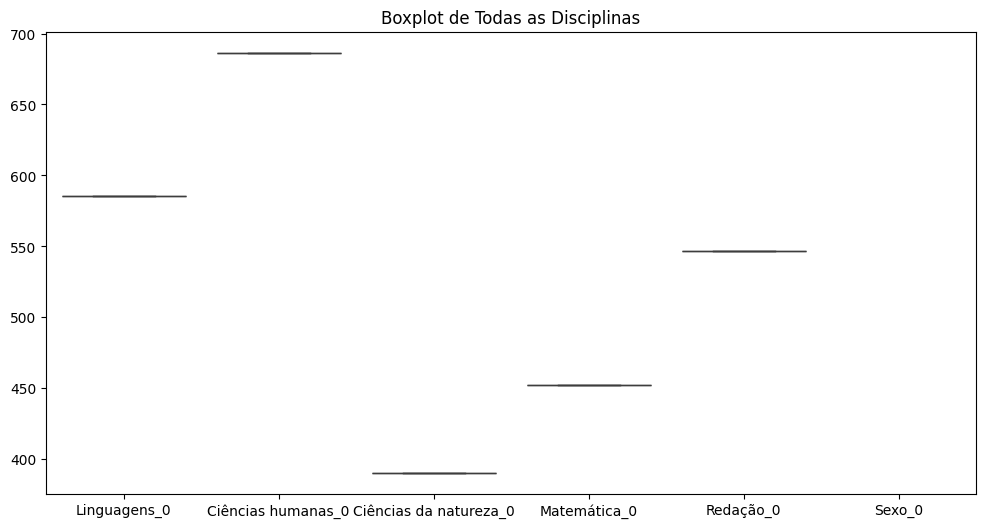

Média Nacional Original: 532.26
Média Nacional sem Outliers: 532.26
Diferença Percentual (sem outliers): 0.00%
Média Geral Original: 532.26, Desvio Padrão Original: 115.48
Média Geral com Preenchimento pela Média: 532.26, Desvio Padrão: 115.48
Média Geral com Preenchimento pela Moda: 532.26, Desvio Padrão: 115.48
Média Geral com Preenchimento pela Mediana: 532.26, Desvio Padrão: 115.48


In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

# URL do arquivo JSON
url = "https://import.cdn.thinkific.com/401289/gQbVuYr9TaimUX9dQAqV_enem_2023.json"

# Carregar os dados do arquivo JSON
enem_data = pd.json_normalize(json.loads(requests.get(url).text))

# Substituir pontos por underscores nas colunas
enem_data.columns = enem_data.columns.str.replace('.', '_', regex=False)

# Selecionar todas as disciplinas usando expressões regulares
disciplinas_todas = enem_data.filter(regex='^[^.]+_0$')

# Remover valores nulos
disciplinas_todas = disciplinas_todas.dropna()

# Identificar e tratar valores não numéricos
non_numeric_columns = disciplinas_todas.columns[~disciplinas_todas.applymap(np.isreal).all()]
for column in non_numeric_columns:
    disciplinas_todas[column] = pd.to_numeric(disciplinas_todas[column], errors='coerce')

# Gerar boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=disciplinas_todas)
plt.title('Boxplot de Todas as Disciplinas')
plt.show()

# Identificar e remover outliers usando o método IQR
Q1 = disciplinas_todas.quantile(0.25)
Q3 = disciplinas_todas.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers_lower = disciplinas_todas.lt(Q1 - 1.5 * IQR)
outliers_upper = disciplinas_todas.gt(Q3 + 1.5 * IQR)

outliers = outliers_lower | outliers_upper

# Calcular a média nacional original
media_nacional_original = disciplinas_todas.stack().mean()

# Remover outliers
disciplinas_sem_outliers = disciplinas_todas.mask(outliers)

# Calcular a média nacional sem outliers
media_nacional_sem_outliers = disciplinas_sem_outliers.stack().mean()

# Calcular a diferença percentual após remover outliers
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

print(f'Média Nacional Original: {media_nacional_original:.2f}')
print(f'Média Nacional sem Outliers: {media_nacional_sem_outliers:.2f}')
print(f'Diferença Percentual (sem outliers): {diferenca_percentual:.2f}%')

# Preencher valores nulos com média, moda e mediana
enem_data_filled_mean = disciplinas_todas.fillna(disciplinas_todas.mean())
enem_data_filled_mode = disciplinas_todas.fillna(disciplinas_todas.mode().iloc[0])  # Usar a moda mais frequente
enem_data_filled_median = disciplinas_todas.fillna(disciplinas_todas.median())

# Calcular média geral e desvio padrão para cada abordagem
mean_original = disciplinas_todas.stack().mean()
std_original = disciplinas_todas.stack().std()

mean_mean = enem_data_filled_mean.stack().mean()
std_mean = enem_data_filled_mean.stack().std()

mean_mode = enem_data_filled_mode.stack().mean()
std_mode = enem_data_filled_mode.stack().std()

mean_median = enem_data_filled_median.stack().mean()
std_median = enem_data_filled_median.stack().std()

# Comparar as alterações na média geral e desvio padrão
print(f'Média Geral Original: {mean_original:.2f}, Desvio Padrão Original: {std_original:.2f}')
print(f'Média Geral com Preenchimento pela Média: {mean_mean:.2f}, Desvio Padrão: {std_mean:.2f}')
print(f'Média Geral com Preenchimento pela Moda: {mean_mode:.2f}, Desvio Padrão: {std_mode:.2f}')
print(f'Média Geral com Preenchimento pela Mediana: {mean_median:.2f}, Desvio Padrão: {std_median:.2f}')
